# Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

## Data Files

In [18]:
import glob

# Find all text files starting with "out"
fileList = glob.glob("out*.txt") 

# Organize the data into arrays
dataArr = []
for file in fileList:
    _, tnum, pbc, N, gam = file.split("-")
    tnum, pbc, N, gam = int(tnum), int(pbc), float(N), float(gam[:-4])

    data = np.loadtxt(file)

    dataArr += [(tnum, pbc, int(N**2), gam, data.T)]


# Get time data
with open("time.txt", "r") as file:
    text = file.read().split("\n")
    text = [item for item in text if len(item) > 2]

tt, rr, uu = [], [], []
for index in range(len(text) // 4):
    index *= 4
    tt += [int(text[index].split("=")[-1])]
    rr += [float(text[index + 1].split("m")[-1][:-1])]
    uu += [float(text[index + 2].split("m")[-1][:-1])]

rr = np.array(rr)

# Square Lattice

In [19]:
def simpson(start: float, end: float, func: Callable, N: int, final: bool = False) -> (float | tuple[np.ndarray, np.ndarray]):
    """
        Calcula o integral de `func` de `start` a `end` com N passos usando a regra de Simpson. Devolve apenas o valor final se `final == True`.
    """
    
    # Verificar que N é par
    N = (N//2) * 2

    # Abcissas
    h = (end - start) / N
    tt = np.linspace(start, end, N + 1)
    vv = func(tt)

    # Área segmentos
    aa = vv[:-2:2] + 4 * vv[1:-1:2] + vv[2: :2]
    integral = h * (aa.cumsum()) / 3

    if final:
        return integral[-1]

    else:
        return tt, integral


def thermodynamicDOS(eps: float) -> (float | tuple[np.ndarray, np.ndarray]):
    a = max([-2, eps - 2])
    b = min([2, eps + 2])

    # Prevent division by zero erros
    a += 0.0001
    b -= 0.0001

    return simpson(a, b, lambda u: (1 / np.sqrt((4 - u**2) * (4-(eps-u)**2))) / np.pi**2, 10000, True)

In [20]:
def plotOne(pbc: int, N: int, gam: float, data: np.ndarray) -> None:
    
    plt.title(f"Density of States for $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
    plt.plot(data[0, :], data[1, :], label="Calculated DOS")
    plt.plot(data[0, :], data[2, :], label="Thermodynamic DOS")
    plt.xlabel("$\\varepsilon / t$")
    plt.ylabel("$\\rho(\\varepsilon) \\times t$")
    plt.legend()
    plt.show()

    print("Analysis for the plot above:")
    print(f"Maximum difference is {np.max(np.abs(data[1, :] - data[2, :]))}")
    print(f"Average difference is {np.mean(data[1, :] - data[2, :])}")
    print(f"Std of difference is {np.std(data[1, :] - data[2, :])}")
    print("\n\n")


def plotAll(dataArr: list, cols: int) -> None:
    # Needed number of columns
    rows = len(dataArr) // cols + 1

    plt.figure(figsize=(cols * 6, rows * 4))
    for index, item in enumerate(dataArr):
        # Getting data
        tnum, pbc, N, gam, data = item
        N = int(N**0.5)

        # TODO: Calculate this only once :b
        tDOS = np.array([thermodynamicDOS(d) for d in data[0, :]])

        # Plotting
        plt.subplot(rows, cols, index+1)
        plt.title(f"Density of States for $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
        plt.plot(data[0, :], data[1, :], label="Calculated DOS")
        plt.plot(data[0, :], tDOS, label="Thermodynamic DOS")
        plt.xlabel("$\\varepsilon / t$")
        plt.ylabel("$\\rho(\\varepsilon) \\times t$")
        plt.legend()

        # Analysis
        print(f"Analysis for N = {N}, gamma = {gam} and {'p.' if pbc else 'o.'}b.c.")
        print(f"Maximum difference is {np.max(np.abs(data[1, :] - tDOS))}")
        print(f"Average difference is {np.mean(data[1, :] - tDOS)}")
        print(f"Std of difference is {np.std(data[1, :] - tDOS)}")
        print("\n\n")    

    plt.subplots_adjust(hspace=0.35)
    plt.show()

C:\Users\Gui\AppData\Local\Temp\ipykernel_14700\1399544236.py:33: RuntimeWarning: invalid value encountered in sqrt
  return simpson(a, b, lambda u: (1 / np.sqrt((4 - u**2) * (4-(eps-u)**2))) / np.pi**2, 10000, True)
C:\Users\Gui\AppData\Local\Temp\ipykernel_14700\1399544236.py:33: RuntimeWarning: divide by zero encountered in divide
  return simpson(a, b, lambda u: (1 / np.sqrt((4 - u**2) * (4-(eps-u)**2))) / np.pi**2, 10000, True)


Analysis for N = 128, gamma = 0.01 and o.b.c.
Maximum difference is nan
Average difference is nan
Std of difference is nan



Analysis for N = 256, gamma = 0.01 and o.b.c.
Maximum difference is nan
Average difference is nan
Std of difference is nan



Analysis for N = 64, gamma = 0.01 and o.b.c.
Maximum difference is nan
Average difference is nan
Std of difference is nan



Analysis for N = 128, gamma = 0.01 and p.b.c.
Maximum difference is nan
Average difference is nan
Std of difference is nan



Analysis for N = 256, gamma = 0.01 and p.b.c.
Maximum difference is nan
Average difference is nan
Std of difference is nan



Analysis for N = 64, gamma = 0.01 and p.b.c.
Maximum difference is nan
Average difference is nan
Std of difference is nan





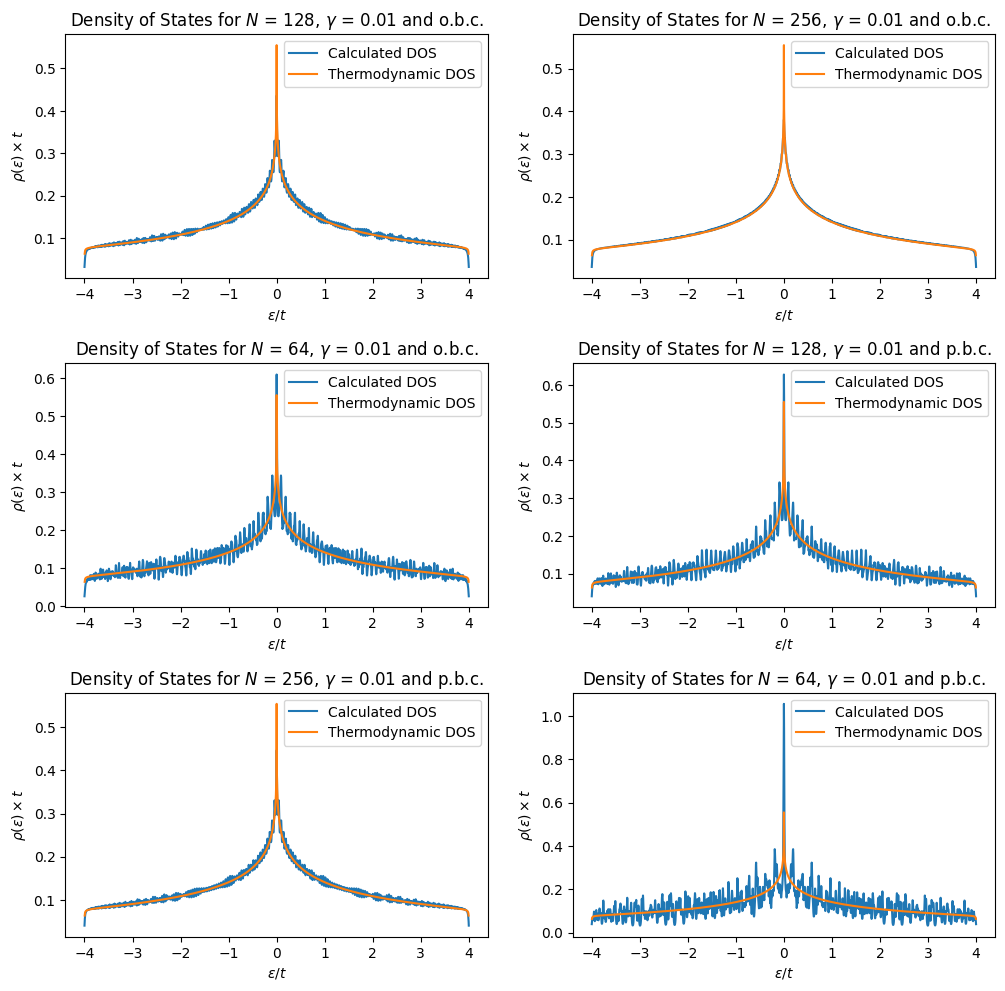

In [21]:
plotAll(dataArr, 2)

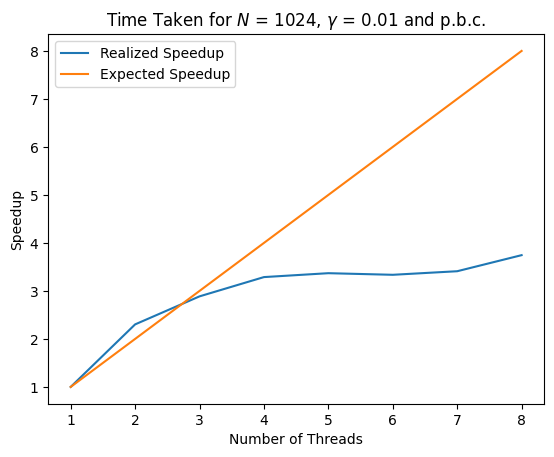

In [22]:
plt.title(f"Time Taken for $N$ = {1024}, $\\gamma$ = {0.01} and {'p.' if True else 'o.'}b.c.")
plt.plot(tt, rr[0] / rr, label="Realized Speedup")
plt.plot(tt, tt, label="Expected Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend()